Detected PPO log format.
PPO plots will use a moving average window of 50 updates for smoothing metrics like losses/entropy.


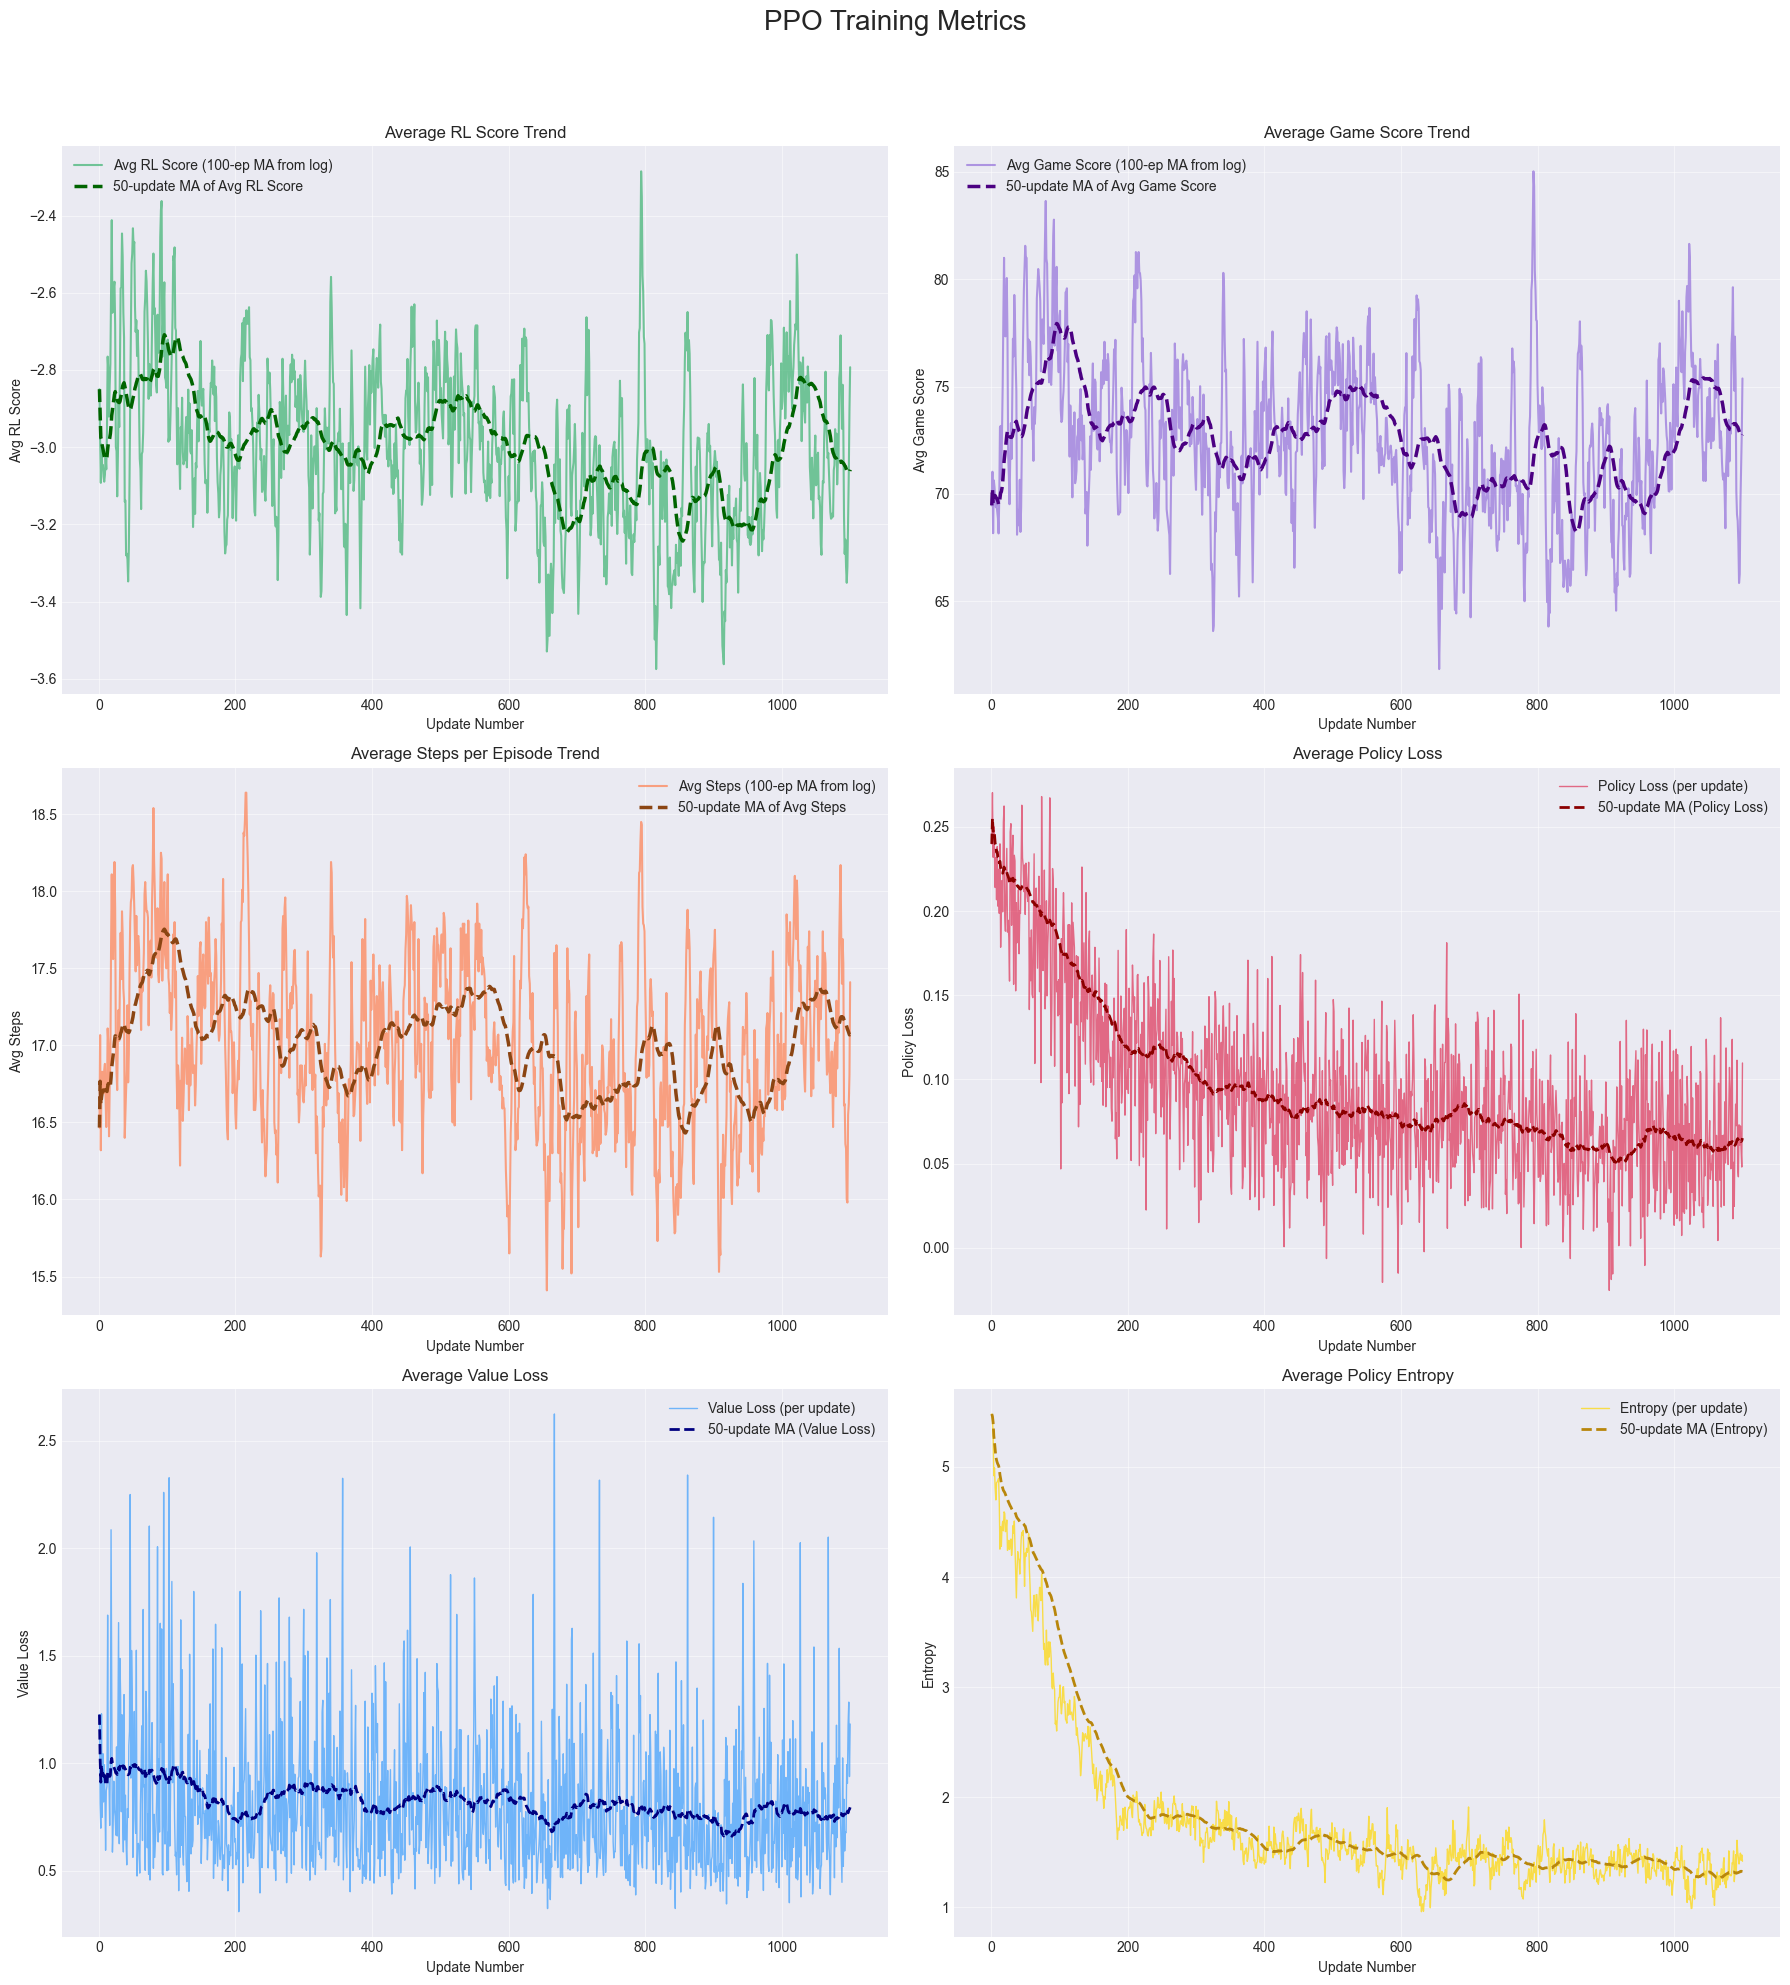

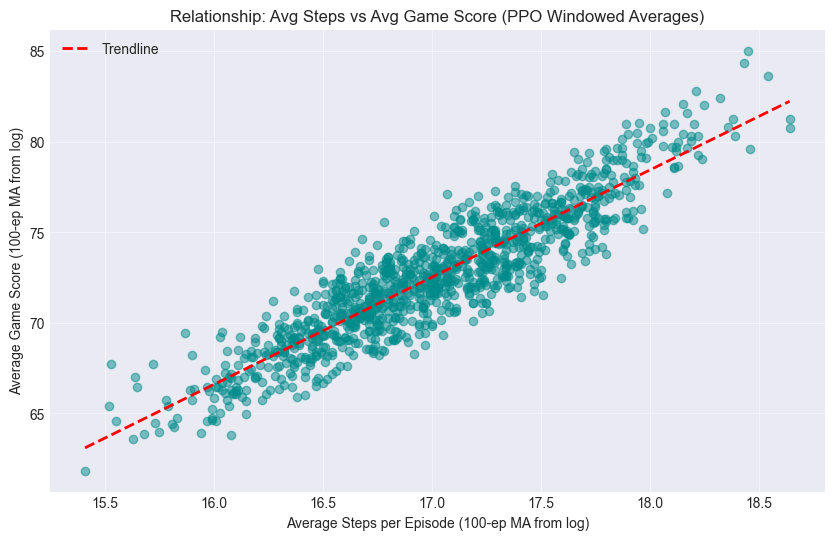

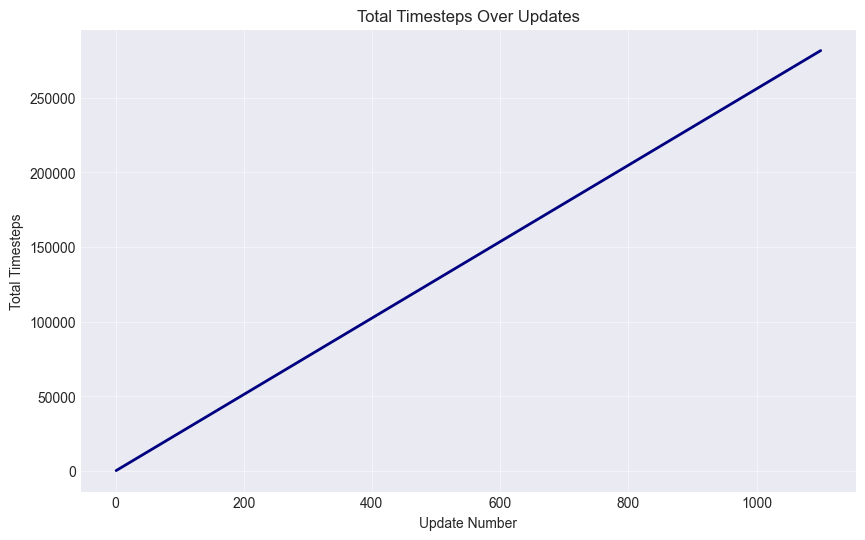

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns

# Load the data
log_file_path = "logs/ppo_training_log_20250510-124749.json" # Ensure this is your PPO log file
try:
    with open(log_file_path, 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print(f"Error: Log file not found at {log_file_path}")
    exit()
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {log_file_path}")
    exit()

# Check if the correct data key exists for PPO logs
if 'updates_data' in data and isinstance(data['updates_data'], list) and data['updates_data']:
    df = pd.DataFrame(data['updates_data'])
    log_type = "PPO"
    x_axis_label = "Update Number"
    x_axis_col = "update_num"
    print("Detected PPO log format.")
elif 'episodes' in data and isinstance(data['episodes'], list) and data['episodes']:
    print("Detected DQN log format. Plotting DQN style metrics...")
    df = pd.DataFrame(data['episodes'])
    log_type = "DQN"
    x_axis_label = "Episode"
    x_axis_col = "episode" # Assuming 'episode' column for DQN x-axis
else:
    print(f"Error: Neither 'updates_data' (for PPO) nor 'episodes' (for DQN) key found in JSON, or the list is empty.")
    exit()


if df.empty:
    print("Error: DataFrame is empty after loading data. Check log content.")
    exit()

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
# sns.set_palette("viridis") # Palette can be customized as needed

# --- PPO Specific Plots ---
if log_type == "PPO":
    fig_ppo, axes_ppo = plt.subplots(3, 2, figsize=(18, 20)) 
    fig_ppo.suptitle('PPO Training Metrics', fontsize=20, y=0.99) # Adjusted y for suptitle
    
    # Moving average window for smoothing trends over PPO update cycles
    ppo_plot_window_size = 50 # Using fixed window size as in your script
    print(f"PPO plots will use a moving average window of {ppo_plot_window_size} updates for smoothing metrics like losses/entropy.")


    # 1. Average RL Score Window
    if 'avg_rl_score_window' in df.columns and x_axis_col in df.columns:
        axes_ppo[0, 0].plot(df[x_axis_col], df['avg_rl_score_window'], color='mediumseagreen', linewidth=1.5, alpha=0.7, label='Avg RL Score (100-ep MA from log)')
        if len(df['avg_rl_score_window']) >= ppo_plot_window_size:
            rl_score_ppo_ma = df['avg_rl_score_window'].rolling(window=ppo_plot_window_size, min_periods=1).mean()
            axes_ppo[0, 0].plot(df[x_axis_col], rl_score_ppo_ma, color='darkgreen', linestyle='--', linewidth=2.5, label=f'{ppo_plot_window_size}-update MA of Avg RL Score')
        axes_ppo[0, 0].set_title('Average RL Score Trend')
        axes_ppo[0, 0].set_ylabel('Avg RL Score')
        axes_ppo[0, 0].legend()
    else:
        axes_ppo[0, 0].set_title('Avg RL Score Data Missing')
    axes_ppo[0, 0].set_xlabel(x_axis_label)
    axes_ppo[0, 0].grid(True, alpha=0.5)

    # 2. Average Game Score Window
    if 'avg_game_score_window' in df.columns and x_axis_col in df.columns:
        axes_ppo[0, 1].plot(df[x_axis_col], df['avg_game_score_window'], color='mediumpurple', linewidth=1.5, alpha=0.7, label='Avg Game Score (100-ep MA from log)')
        if len(df['avg_game_score_window']) >= ppo_plot_window_size:
            game_score_ppo_ma = df['avg_game_score_window'].rolling(window=ppo_plot_window_size, min_periods=1).mean()
            axes_ppo[0, 1].plot(df[x_axis_col], game_score_ppo_ma, color='indigo', linestyle='--', linewidth=2.5, label=f'{ppo_plot_window_size}-update MA of Avg Game Score')
        axes_ppo[0, 1].set_title('Average Game Score Trend')
        axes_ppo[0, 1].set_ylabel('Avg Game Score')
        axes_ppo[0, 1].legend()
    else:
        axes_ppo[0, 1].set_title('Avg Game Score Data Missing')
    axes_ppo[0, 1].set_xlabel(x_axis_label)
    axes_ppo[0, 1].grid(True, alpha=0.5)

    # 3. Average Steps per Episode Window
    if 'avg_steps_window' in df.columns and x_axis_col in df.columns:
        axes_ppo[1, 0].plot(df[x_axis_col], df['avg_steps_window'], color='coral', linewidth=1.5, alpha=0.7, label='Avg Steps (100-ep MA from log)')
        if len(df['avg_steps_window']) >= ppo_plot_window_size:
            steps_ppo_ma = df['avg_steps_window'].rolling(window=ppo_plot_window_size, min_periods=1).mean()
            axes_ppo[1, 0].plot(df[x_axis_col], steps_ppo_ma, color='saddlebrown', linestyle='--', linewidth=2.5, label=f'{ppo_plot_window_size}-update MA of Avg Steps')
        axes_ppo[1, 0].set_title('Average Steps per Episode Trend')
        axes_ppo[1, 0].set_ylabel('Avg Steps')
        axes_ppo[1, 0].legend()
    else:
        axes_ppo[1, 0].set_title('Avg Steps Data Missing')
    axes_ppo[1, 0].set_xlabel(x_axis_label)
    axes_ppo[1, 0].grid(True, alpha=0.5)

    # 4. Policy Loss
    if 'avg_policy_loss' in df.columns and x_axis_col in df.columns:
        axes_ppo[1, 1].plot(df[x_axis_col], df['avg_policy_loss'], color='crimson', linewidth=1, alpha=0.6, label='Policy Loss (per update)')
        if len(df['avg_policy_loss']) >= ppo_plot_window_size:
            policy_loss_ma = df['avg_policy_loss'].rolling(window=ppo_plot_window_size, min_periods=1).mean()
            axes_ppo[1, 1].plot(df[x_axis_col], policy_loss_ma, color='darkred', linestyle='--', linewidth=2, label=f'{ppo_plot_window_size}-update MA (Policy Loss)')
        axes_ppo[1, 1].set_title('Average Policy Loss')
        axes_ppo[1, 1].set_ylabel('Policy Loss')
        axes_ppo[1, 1].legend()
    else:
        axes_ppo[1, 1].set_title('Policy Loss Data Missing')
    axes_ppo[1, 1].set_xlabel(x_axis_label)
    axes_ppo[1, 1].grid(True, alpha=0.5)

    # 5. Value Loss
    # Corrected window_size variable name from your original snippet for this plot
    if 'avg_value_loss' in df.columns and x_axis_col in df.columns:
        axes_ppo[2, 0].plot(df[x_axis_col], df['avg_value_loss'], color='dodgerblue', linewidth=1, alpha=0.6, label='Value Loss (per update)')
        if len(df['avg_value_loss']) >= ppo_plot_window_size: # Use ppo_plot_window_size
            value_loss_ma = df['avg_value_loss'].rolling(window=ppo_plot_window_size, min_periods=1).mean()
            axes_ppo[2, 0].plot(df[x_axis_col], value_loss_ma, color='navy', linestyle='--', linewidth=2, label=f'{ppo_plot_window_size}-update MA (Value Loss)')
        axes_ppo[2, 0].set_title('Average Value Loss')
        axes_ppo[2, 0].set_ylabel('Value Loss')
        axes_ppo[2, 0].legend()
    else:
        axes_ppo[2, 0].set_title('Value Loss Data Missing')
    axes_ppo[2, 0].set_xlabel(x_axis_label)
    axes_ppo[2, 0].grid(True, alpha=0.5)

    # 6. Entropy
    if 'avg_entropy' in df.columns and x_axis_col in df.columns:
        axes_ppo[2, 1].plot(df[x_axis_col], df['avg_entropy'], color='gold', linewidth=1, alpha=0.7, label='Entropy (per update)')
        if len(df['avg_entropy']) >= ppo_plot_window_size:
            entropy_ma = df['avg_entropy'].rolling(window=ppo_plot_window_size, min_periods=1).mean()
            axes_ppo[2, 1].plot(df[x_axis_col], entropy_ma, color='darkgoldenrod', linestyle='--', linewidth=2, label=f'{ppo_plot_window_size}-update MA (Entropy)')
        axes_ppo[2, 1].set_title('Average Policy Entropy')
        axes_ppo[2, 1].set_ylabel('Entropy')
        axes_ppo[2, 1].legend()
    else:
        axes_ppo[2, 1].set_title('Entropy Data Missing')
    axes_ppo[2, 1].set_xlabel(x_axis_label)
    axes_ppo[2, 1].grid(True, alpha=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()

    # Correlation plot for PPO (using windowed averages from log)
    plt.figure(figsize=(10, 6))
    # Determine which df to use for correlation based on whether learning has started (for DQN)
    # For PPO, plot_data_for_correlation is simply df.
    plot_data_for_correlation_ppo = df 
    game_score_col_ppo = 'avg_game_score_window' # PPO logs this
    steps_col_ppo = 'avg_steps_window'          # PPO logs this

    if steps_col_ppo in plot_data_for_correlation_ppo.columns and \
       game_score_col_ppo in plot_data_for_correlation_ppo.columns and \
       not plot_data_for_correlation_ppo.empty:
        
        plt.scatter(plot_data_for_correlation_ppo[steps_col_ppo], plot_data_for_correlation_ppo[game_score_col_ppo], alpha=0.5, color='darkcyan')
        plt.title('Relationship: Avg Steps vs Avg Game Score (PPO Windowed Averages)')
        
        valid_corr_data = plot_data_for_correlation_ppo[[steps_col_ppo, game_score_col_ppo]].dropna()
        if len(valid_corr_data) > 1:
            try:
                z = np.polyfit(valid_corr_data[steps_col_ppo], valid_corr_data[game_score_col_ppo], 1)
                p = np.poly1d(z)
                min_steps_val = valid_corr_data[steps_col_ppo].min()
                max_steps_val = valid_corr_data[steps_col_ppo].max()
                if pd.notna(min_steps_val) and pd.notna(max_steps_val) and min_steps_val < max_steps_val:
                    plot_x_range = np.linspace(min_steps_val, max_steps_val, 100)
                    plt.plot(plot_x_range, p(plot_x_range), "r--", linewidth=2, label='Trendline')
                plt.legend()
            except Exception as e:
                print(f"Could not plot trendline for PPO correlation: {e}")
    else:
        plt.title('Avg Steps vs Avg Game Score Data Missing or Insufficient (PPO)')
    plt.xlabel('Average Steps per Episode (100-ep MA from log)')
    plt.ylabel('Average Game Score (100-ep MA from log)')
    plt.grid(True, alpha=0.5)
    plt.show()

    # Total Timesteps plot for PPO
    if 'total_timesteps' in df.columns and x_axis_col in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df[x_axis_col], df['total_timesteps'], color='navy', linewidth=2)
        plt.title('Total Timesteps Over Updates')
        plt.xlabel(x_axis_label)
        plt.ylabel('Total Timesteps')
        plt.grid(True, alpha=0.5)
        plt.show()

elif log_type == "DQN":
    print("Plotting DQN style metrics (using provided DQN plotting structure)...")
    
    # --- Determine the episode where learning starts (DQN specific) ---
    LEARNING_STARTS_STEPS_DQN = data.get("settings", {}).get("learning_starts", 10000)
    start_learning_episode_dqn = 1
    learning_starts_df_empty_dqn = True # Flag for DQN learning start check

    # Ensure 'buffer_size' and 'episode' columns exist for DQN logic
    if 'buffer_size' in df.columns and 'episode' in df.columns:
        learning_starts_df_dqn_data = df[df['buffer_size'] >= LEARNING_STARTS_STEPS_DQN]
        if not learning_starts_df_dqn_data.empty:
            start_learning_episode_dqn = learning_starts_df_dqn_data['episode'].iloc[0]
            learning_starts_df_empty_dqn = False
            print(f"DQN Learning starts around episode: {start_learning_episode_dqn} (after approx. {LEARNING_STARTS_STEPS_DQN} steps)")
        else:
            max_buffer_size = df['buffer_size'].max() if not df['buffer_size'].empty else 0
            print(f"Warning (DQN): No episode found where buffer_size ({max_buffer_size}) >= LEARNING_STARTS_STEPS ({LEARNING_STARTS_STEPS_DQN}). Plotting all data for score/steps.")
    elif 'episode' not in df.columns:
         print("Warning (DQN): 'episode' column not found in log. Cannot filter by episode for learning phase plots.")
    else: # buffer_size column missing
         print("Warning (DQN): 'buffer_size' column not found for DQN log. Cannot determine learning start. Plotting all data.")
    
    df_learning_dqn = df[df[x_axis_col] >= start_learning_episode_dqn].copy() if x_axis_col in df.columns and not learning_starts_df_empty_dqn else df.copy()


    fig_dqn, axes_dqn = plt.subplots(2, 2, figsize=(18, 12))
    fig_dqn.suptitle('Blockdoku AI Training Metrics (DQN Log)', fontsize=16)
    dqn_window_size = 100 

    # 1. Buffer Size plot (for DQN)
    if x_axis_col in df.columns and 'buffer_size' in df.columns:
        axes_dqn[0, 0].plot(df[x_axis_col], df['buffer_size'], color='blue', linewidth=2)
        axes_dqn[0, 0].set_title('Buffer Size Growth (All Episodes)')
        axes_dqn[0, 0].set_xlabel(x_axis_label)
        axes_dqn[0, 0].set_ylabel('Buffer Size (Total Steps)')
        if start_learning_episode_dqn > 1 and not learning_starts_df_empty_dqn:
            axes_dqn[0, 0].axvline(x=start_learning_episode_dqn, color='r', linestyle='--', label=f'Learning Starts (Ep {start_learning_episode_dqn})')
            axes_dqn[0, 0].legend()
    else:
        axes_dqn[0,0].set_title('Buffer Size Data Missing')
    axes_dqn[0, 0].grid(True, alpha=0.5)

    # 2. RL Score plot (for DQN)
    rl_score_col_dqn = 'rl_score' if 'rl_score' in df.columns else 'score'
    # Use df_learning_dqn if it's meaningful, otherwise df
    target_df_rl = df_learning_dqn if start_learning_episode_dqn > 1 and not learning_starts_df_empty_dqn and not df_learning_dqn.empty else df
    if x_axis_col in target_df_rl.columns and rl_score_col_dqn in target_df_rl.columns:
        axes_dqn[0, 1].plot(target_df_rl[x_axis_col], target_df_rl[rl_score_col_dqn], color='green', linewidth=1, alpha=0.5, label='RL Score')
        title_suffix_rl_dqn = f'(From Ep {start_learning_episode_dqn})' if start_learning_episode_dqn > 1 and not learning_starts_df_empty_dqn and not df_learning_dqn.empty else '(All Episodes)'
        axes_dqn[0, 1].set_title(f'RL Score per Episode {title_suffix_rl_dqn}')
        if len(target_df_rl[rl_score_col_dqn]) >= dqn_window_size:
            rl_score_ma_dqn = target_df_rl[rl_score_col_dqn].rolling(window=dqn_window_size, min_periods=1).mean()
            axes_dqn[0, 1].plot(target_df_rl[x_axis_col], rl_score_ma_dqn, 
                                color='darkgreen', linewidth=2, linestyle='--',
                                label=f'{dqn_window_size}-ep Moving Avg (RL Score)')
        axes_dqn[0, 1].legend()
    else:
        axes_dqn[0,1].set_title('RL Score Data Missing or df_learning_dqn is empty')
    axes_dqn[0, 1].set_xlabel(x_axis_label)
    axes_dqn[0, 1].set_ylabel('RL Score')
    axes_dqn[0, 1].grid(True, alpha=0.5)

    # 3. Game Score plot (for DQN)
    game_score_col_dqn = 'game_score' if 'game_score' in df.columns else 'game score'
    target_df_game = df_learning_dqn if start_learning_episode_dqn > 1 and not learning_starts_df_empty_dqn and not df_learning_dqn.empty else df
    if x_axis_col in target_df_game.columns and game_score_col_dqn in target_df_game.columns:
        axes_dqn[1, 0].plot(target_df_game[x_axis_col], target_df_game[game_score_col_dqn], color='purple', linewidth=1, alpha=0.5, label='Game Score')
        title_suffix_game_dqn = f'(From Ep {start_learning_episode_dqn})' if start_learning_episode_dqn > 1 and not learning_starts_df_empty_dqn and not df_learning_dqn.empty else '(All Episodes)'
        axes_dqn[1, 0].set_title(f'Game Score per Episode {title_suffix_game_dqn}')
        if len(target_df_game[game_score_col_dqn]) >= dqn_window_size:
            score_ma_dqn = target_df_game[game_score_col_dqn].rolling(window=dqn_window_size, min_periods=1).mean()
            axes_dqn[1, 0].plot(target_df_game[x_axis_col], score_ma_dqn, 
                                color='darkblue', linewidth=2,
                                label=f'{dqn_window_size}-ep Moving Avg (Game Score)')
        axes_dqn[1, 0].legend()
    else:
        axes_dqn[1,0].set_title('Game Score Data Missing or df_learning_dqn is empty')
    axes_dqn[1, 0].set_xlabel(x_axis_label)
    axes_dqn[1, 0].set_ylabel('Game Score')
    axes_dqn[1, 0].grid(True, alpha=0.5)

    # 4. Steps per Episode plot (for DQN)
    target_df_steps = df_learning_dqn if start_learning_episode_dqn > 1 and not learning_starts_df_empty_dqn and not df_learning_dqn.empty else df
    if x_axis_col in target_df_steps.columns and 'steps' in target_df_steps.columns:
        axes_dqn[1, 1].plot(target_df_steps[x_axis_col], target_df_steps['steps'], color='orange', linewidth=1, alpha=0.7, label='Steps')
        title_suffix_steps_dqn = f'(From Ep {start_learning_episode_dqn})' if start_learning_episode_dqn > 1 and not learning_starts_df_empty_dqn and not df_learning_dqn.empty else '(All Episodes)'
        axes_dqn[1, 1].set_title(f'Steps per Episode {title_suffix_steps_dqn}')
        if len(target_df_steps['steps']) >= dqn_window_size:
            steps_ma_dqn = target_df_steps['steps'].rolling(window=dqn_window_size, min_periods=1).mean()
            axes_dqn[1, 1].plot(target_df_steps[x_axis_col], steps_ma_dqn, 
                                color='brown', linewidth=2, linestyle='--',
                                label=f'{dqn_window_size}-ep Moving Average')
        axes_dqn[1, 1].legend()
    else:
        axes_dqn[1,1].set_title('Steps Data Missing or df_learning_dqn is empty')
    axes_dqn[1, 1].set_xlabel(x_axis_label)
    axes_dqn[1, 1].set_ylabel('Steps')
    axes_dqn[1, 1].grid(True, alpha=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # DQN Correlation Plot
    plt.figure(figsize=(10, 6))
    plot_data_for_correlation_dqn = df_learning_dqn if start_learning_episode_dqn > 1 and not learning_starts_df_empty_dqn and not df_learning_dqn.empty else df
    if not plot_data_for_correlation_dqn.empty and 'steps' in plot_data_for_correlation_dqn.columns and game_score_col_dqn in plot_data_for_correlation_dqn.columns:
        plt.scatter(plot_data_for_correlation_dqn['steps'], plot_data_for_correlation_dqn[game_score_col_dqn], alpha=0.5)
        title_suffix_corr_dqn = f'(From Ep {start_learning_episode_dqn})' if start_learning_episode_dqn > 1 and not learning_starts_df_empty_dqn and not df_learning_dqn.empty else '(All Episodes)'
        plt.title(f'Relationship between Steps and Game Score (DQN) {title_suffix_corr_dqn}')
        valid_corr_data_dqn = plot_data_for_correlation_dqn[['steps', game_score_col_dqn]].dropna()
        if len(valid_corr_data_dqn) > 1:
            try:
                z_dqn = np.polyfit(valid_corr_data_dqn['steps'], valid_corr_data_dqn[game_score_col_dqn], 1)
                p_dqn = np.poly1d(z_dqn)
                min_steps_dqn = valid_corr_data_dqn['steps'].min()
                max_steps_dqn = valid_corr_data_dqn['steps'].max()
                if pd.notna(min_steps_dqn) and pd.notna(max_steps_dqn) and min_steps_dqn < max_steps_dqn:
                    plot_x_range_dqn = np.linspace(min_steps_dqn, max_steps_dqn, 100)
                    plt.plot(plot_x_range_dqn, p_dqn(plot_x_range_dqn), "r--", linewidth=2, label='Trendline')
                plt.legend()
            except Exception as e:
                print(f"Could not plot trendline for DQN correlation: {e}")
    else:
        plt.title('Steps vs Game Score Data Missing or Insufficient (DQN)')
    plt.xlabel('Steps in Episode')
    plt.ylabel('Game Score')
    plt.grid(True, alpha=0.5)
    plt.show()

    # DQN Epsilon and Loss plots
    fig_el_dqn, axes_el_dqn = plt.subplots(1, 2, figsize=(18, 6))
    fig_el_dqn.suptitle('Epsilon and Loss Over Training (DQN Log)', fontsize=16)

    # Epsilon plot
    if x_axis_col in df.columns and 'epsilon' in df.columns:
        axes_el_dqn[0].plot(df[x_axis_col], df['epsilon'], color='teal', linewidth=1.5, label='Epsilon')
        if len(df['epsilon']) >= dqn_window_size:
             epsilon_ma = df['epsilon'].rolling(window=dqn_window_size, min_periods=1).mean()
             axes_el_dqn[0].plot(df[x_axis_col], epsilon_ma, color='darkblue', linestyle='--', linewidth=2, label=f'{dqn_window_size}-ep MA (Epsilon)')
        axes_el_dqn[0].set_title('Exploration Rate (Epsilon)')
        axes_el_dqn[0].legend()
    else:
        axes_el_dqn[0].set_title('Epsilon Data Missing')
    axes_el_dqn[0].set_xlabel(x_axis_label)
    axes_el_dqn[0].grid(True, alpha=0.5)

    # Loss plot
    if x_axis_col in df.columns and 'avg_loss' in df.columns:
        axes_el_dqn[1].plot(df[x_axis_col], df['avg_loss'], color='crimson', linewidth=1.5, label='Average Loss')
        if len(df['avg_loss']) >= dqn_window_size:
            loss_ma = df['avg_loss'].rolling(window=dqn_window_size, min_periods=1).mean()
            axes_el_dqn[1].plot(df[x_axis_col], loss_ma, color='darkred', linestyle='--', linewidth=2, label=f'{dqn_window_size}-ep MA (Loss)')
        axes_el_dqn[1].set_title('Training Loss')
        axes_el_dqn[1].legend()
    else:
        axes_el_dqn[1].set_title('Loss Data Missing')
    axes_el_dqn[1].set_xlabel(x_axis_label)
    axes_el_dqn[1].grid(True, alpha=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

else:
    print(f"Log type not recognized or data structure unexpected. Please check the JSON log file: {log_file_path}")

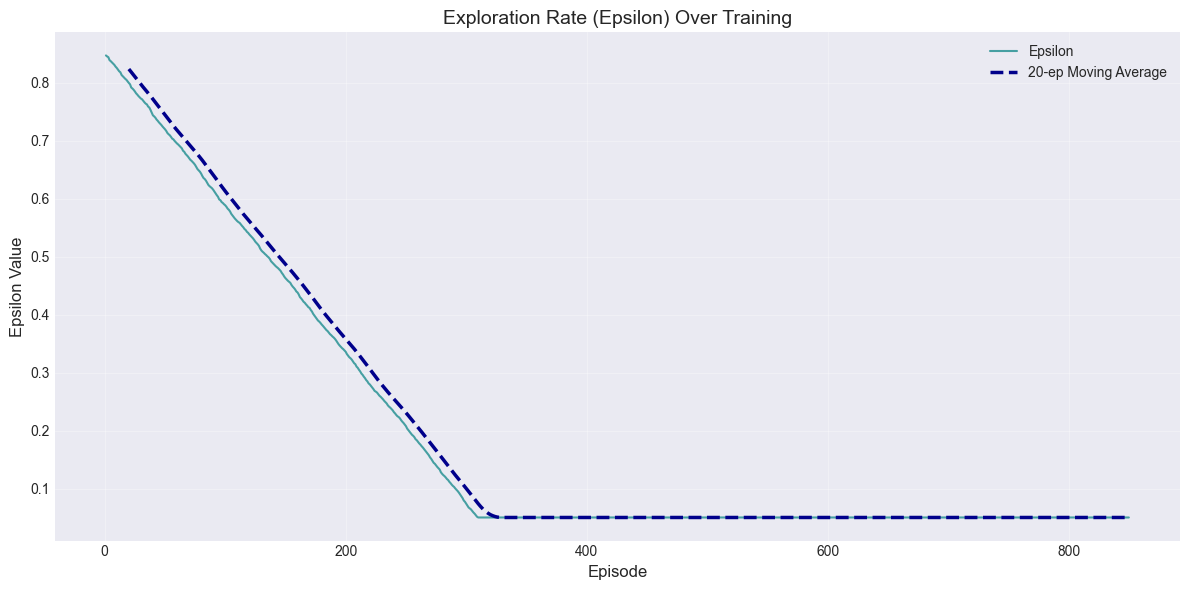

In [5]:
# Plot epsilon values over training
plt.figure(figsize=(12, 6))

# Main epsilon plot
plt.plot(df['episode'], df['epsilon'], color='teal', linewidth=1.5, alpha=0.7, label='Epsilon')

# Add moving average line
window_size = 20
epsilon_ma = df['epsilon'].rolling(window=window_size).mean()
plt.plot(df['episode'][window_size-1:], epsilon_ma[window_size-1:], 
         color='darkblue', linewidth=2.5, linestyle='--',
         label=f'{window_size}-ep Moving Average')

# Add styling and labels
plt.title('Exploration Rate (Epsilon) Over Training', fontsize=14)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Epsilon Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

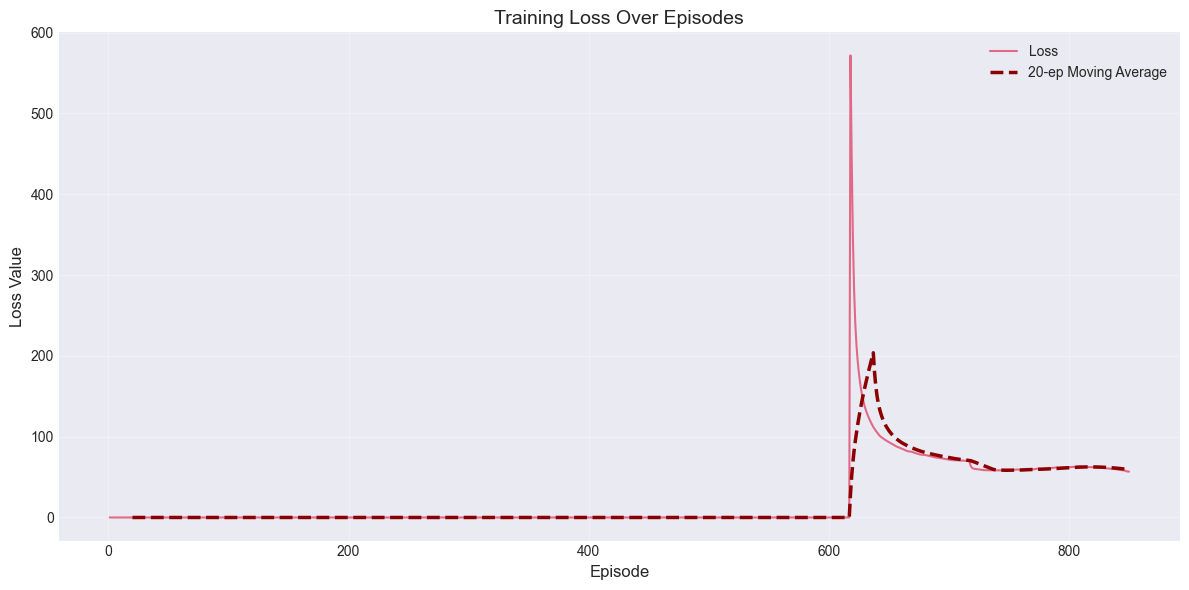

In [6]:
# Plot loss values over training
plt.figure(figsize=(12, 6))

# Check if loss data exists in the DataFrame
if 'avg_loss' in df.columns:
    # Main loss plot
    plt.plot(df['episode'], df['avg_loss'], color='crimson', linewidth=1.5, alpha=0.6, label='Loss')
    
    # Add moving average line
    window_size = 20
    loss_ma = df['avg_loss'].rolling(window=window_size).mean()
    plt.plot(df['episode'][window_size-1:], loss_ma[window_size-1:], 
             color='darkred', linewidth=2.5, linestyle='--',
             label=f'{window_size}-ep Moving Average')
    
    # Add styling and labels
    plt.title('Training Loss Over Episodes', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Loss Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("Loss data not found in the training log. Make sure 'avg_loss' is being recorded.")